In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import load
import os
import PIL
import tensorflow as tf
import pandas as pd

from tensorflow import keras
from tensorflow.keras import layers, datasets, models
from tensorflow.keras.models import Sequential

import pickle
from PIL import Image

In [2]:
#Loading data from .npz files

a1 = np.load('kmnist-train-imgs.npz')['arr_0']
a2 = np.load('kmnist-train-labels.npz')['arr_0']
a3 = np.load('kmnist-test-imgs.npz')['arr_0']
a4 = np.load('kmnist-test-labels.npz')['arr_0']

merged_dataset = [a1,a2,a3,a4]
#np.savez('output_dataset.npz',merged_dataset)

In [3]:
##Splitting the data

train_imgs, train_labels, test_imgs, test_labels = merged_dataset

#Test array shapes with print statements below
print('X_train: ' + str(train_imgs.shape))
print('Y_train: ' + str(train_labels.shape))
print('X_test:  '  + str(test_imgs.shape))
print('Y_test:  '  + str(test_labels.shape))

##Normalizing the data
train_imgs = train_imgs.astype('float32')
test_imgs = test_imgs.astype('float32')
train_imgs, test_imgs = train_imgs / 255.0, test_imgs / 255.0

train_labels = tf.keras.utils.to_categorical(train_labels, num_classes=10)
test_labels = keras.utils.to_categorical(test_labels, num_classes=10)

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


In [4]:
#Creating input dimension and initial layers

img_rows, img_cols = 28, 28

train_imgs = train_imgs.reshape(train_imgs.shape[0], img_rows, img_cols, 1)
test_imgs = test_imgs.reshape(test_imgs.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

classes = ["お", "き", "す", "つ", "な", "は", "ま", "や", "れ", "を"]

model = models.Sequential()
model.add(layers.Conv2D(32, 3, activation='relu',input_shape=input_shape))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
dense (Dense)                (None, 26, 26, 10)        330       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 10)        0         
Total params: 650
Trainable params: 650
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))
model.add(layers.Dense(10, activation='softmax'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
dense (Dense)                (None, 26, 26, 10)        330       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 1690)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                108224    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1

In [8]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

history = model.fit(train_imgs, train_labels, epochs=2, 
                    validation_data=(test_imgs, test_labels))

Epoch 1/2
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


2022-05-03 09:55:39.609588: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-05-03 09:55:39.611510: W tensorflow/core/platform/profile_utils/cpu_utils.cc:126] Failed to get CPU frequency: 0 Hz


1873/1875 [============================>.] - ETA: 0s - loss: 0.6171 - accuracy: 0.8093WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x159d05b80> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1875/1875 [==============================] - 13s 7ms/step - loss: 0.6166 - accuracy: 0.8095 - val_loss: 0.3773 - val_accuracy: 0.8876


313/313 - 0s - loss: 0.3030 - accuracy: 0.9138


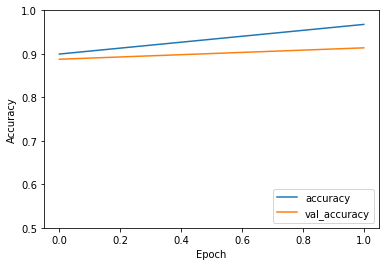

In [9]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_imgs, test_labels, verbose=2)

In [10]:
b1 = np.load('k49-train-imgs.npz')['arr_0']
b2 = np.load('k49-train-labels.npz')['arr_0']
b3 = np.load('k49-test-imgs.npz')['arr_0']
b4 = np.load('k49-test-labels.npz')['arr_0']

merged_dataset_1 = [b1,b2,b3,b4]

train_imgs_1, train_labels_1, test_imgs_1, test_labels_1 = merged_dataset_1

#Test array shapes with print statements below
print('X_train: ' + str(train_imgs_1.shape))
print('Y_train: ' + str(train_labels_1.shape))
print('X_test:  '  + str(test_imgs_1.shape))
print('Y_test:  '  + str(test_labels_1.shape))

X_train: (232365, 28, 28)
Y_train: (232365,)
X_test:  (38547, 28, 28)
Y_test:  (38547,)


In [11]:
##Normalizing the data
train_imgs_1 = train_imgs_1.astype('float32')
test_imgs_1 = test_imgs_1.astype('float32')
train_imgs_1, test_imgs_1 = train_imgs_1 / 255.0, test_imgs_1 / 255.0

train_labels_1 = tf.keras.utils.to_categorical(train_labels_1, num_classes=49)
test_labels_1 = keras.utils.to_categorical(test_labels_1, num_classes=49)

#Shaping the data

img_rows, img_cols = 28, 28

train_imgs_1 = train_imgs_1.reshape(train_imgs_1.shape[0], img_rows, img_cols, 1)
test_imgs_1 = test_imgs_1.reshape(test_imgs_1.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

In [12]:
model_1 = models.Sequential()
model_1.add(layers.Conv2D(32, 3, activation='relu',input_shape=input_shape))
model_1.add(layers.Dense(49, activation='relu'))
model_1.add(layers.MaxPooling2D(pool_size=(2, 2)))

In [13]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
dense_4 (Dense)              (None, 26, 26, 49)        1617      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 49)        0         
Total params: 1,937
Trainable params: 1,937
Non-trainable params: 0
_________________________________________________________________


In [14]:
model_1.add(layers.Flatten())
model_1.add(layers.Dense(64, activation='relu'))
model_1.add(layers.Dense(49))
model_1.add(layers.Dense(49, activation='softmax'))

In [15]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
dense_4 (Dense)              (None, 26, 26, 49)        1617      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 49)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 8281)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                530048    
_________________________________________________________________
dense_6 (Dense)              (None, 49)                3185      
_________________________________________________________________
dense_7 (Dense)              (None, 49)               

In [16]:
model_1.compile(optimizer='adam',
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

history = model_1.fit(train_imgs_1, train_labels_1, epochs=2, 
                    validation_data=(test_imgs_1, test_labels_1))

Epoch 1/2
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
7260/7262 [============================>.] - ETA: 0s - loss: 0.9101 - accuracy: 0.7668WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x159ee24c0> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSI

1205/1205 - 3s - loss: 0.5316 - accuracy: 0.8656


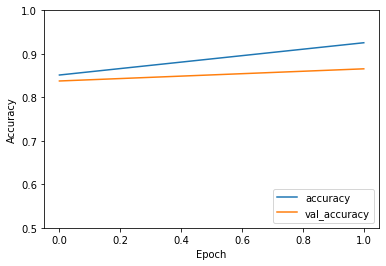

In [17]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss_1, test_acc_1 = model_1.evaluate(test_imgs_1, test_labels_1, verbose=2)

In [18]:
data_paths = [i for i in (os.path.join('/Users/zach/ML Final Project/kana', f) for f in os.listdir('/Users/zach/ML Final Project/kana')) if os.path.isfile(i)]
#path_1 = '/Users/zach/ML Final Project/kana'
for image in data_paths:
    hwi = Image.open(image)
    hwi = np.resize(hwi, (28,28,1))
    hwi_arr = np.array(hwi)
    hwi_arr = hwi_arr.reshape(1,28,28,1)
    hwi_pred = model_1.predict(hwi_arr)
    print(hwi_pred)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
[[5.2942810e-06 9.8108465e-04 6.2826788e-03 9.6087595e-03 1.5724594e-04
  8.6719580e-03 2.1746530e-06 1.6950222e-02 4.3614345e-05 3.5732042e-02
  1.7043964e-04 4.5771763e-02 7.2963944e-06 3.1697209e-06 2.5881155e-04
  2.3861625e-04 7.2257360e-04 7.0318966e-03 1.8445686e-03 5.4778467e-04
  4.6904395e-05 1.4180884e-03 6.4278711e-06 9.6758401e-07 1.1180700e-04
  1.61

[[5.2942810e-06 9.8108465e-04 6.2826788e-03 9.6087595e-03 1.5724594e-04
  8.6719580e-03 2.1746530e-06 1.6950222e-02 4.3614345e-05 3.5732042e-02
  1.7043964e-04 4.5771763e-02 7.2963944e-06 3.1697209e-06 2.5881155e-04
  2.3861625e-04 7.2257360e-04 7.0318966e-03 1.8445686e-03 5.4778467e-04
  4.6904395e-05 1.4180884e-03 6.4278711e-06 9.6758401e-07 1.1180700e-04
  1.6130762e-02 9.1952832e-05 2.8047321e-04 8.4464025e-04 5.7054971e-05
  2.9542973e-06 7.5151568e-04 1.7537477e-05 9.3221031e-05 3.3012035e-05
  3.3371284e-06 4.1215667e-06 3.8842396e-03 4.1292820e-02 4.6284222e-03
  2.8542127e-03 4.6933121e-05 3.6940485e-04 2.0444872e-04 7.9467545e-06
  7.7288845e-05 4.9964742e-06 6.1918222e-03 7.8551066e-01]]
[[5.2942810e-06 9.8108465e-04 6.2826788e-03 9.6087595e-03 1.5724594e-04
  8.6719580e-03 2.1746530e-06 1.6950222e-02 4.3614345e-05 3.5732042e-02
  1.7043964e-04 4.5771763e-02 7.2963944e-06 3.1697209e-06 2.5881155e-04
  2.3861625e-04 7.2257360e-04 7.0318966e-03 1.8445686e-03 5.4778467e-04
  4.

[[5.2942810e-06 9.8108465e-04 6.2826788e-03 9.6087595e-03 1.5724594e-04
  8.6719580e-03 2.1746530e-06 1.6950222e-02 4.3614345e-05 3.5732042e-02
  1.7043964e-04 4.5771763e-02 7.2963944e-06 3.1697209e-06 2.5881155e-04
  2.3861625e-04 7.2257360e-04 7.0318966e-03 1.8445686e-03 5.4778467e-04
  4.6904395e-05 1.4180884e-03 6.4278711e-06 9.6758401e-07 1.1180700e-04
  1.6130762e-02 9.1952832e-05 2.8047321e-04 8.4464025e-04 5.7054971e-05
  2.9542973e-06 7.5151568e-04 1.7537477e-05 9.3221031e-05 3.3012035e-05
  3.3371284e-06 4.1215667e-06 3.8842396e-03 4.1292820e-02 4.6284222e-03
  2.8542127e-03 4.6933121e-05 3.6940485e-04 2.0444872e-04 7.9467545e-06
  7.7288845e-05 4.9964742e-06 6.1918222e-03 7.8551066e-01]]
[[5.2942810e-06 9.8108465e-04 6.2826788e-03 9.6087595e-03 1.5724594e-04
  8.6719580e-03 2.1746530e-06 1.6950222e-02 4.3614345e-05 3.5732042e-02
  1.7043964e-04 4.5771763e-02 7.2963944e-06 3.1697209e-06 2.5881155e-04
  2.3861625e-04 7.2257360e-04 7.0318966e-03 1.8445686e-03 5.4778467e-04
  4.

[[5.2942810e-06 9.8108465e-04 6.2826788e-03 9.6087595e-03 1.5724594e-04
  8.6719580e-03 2.1746530e-06 1.6950222e-02 4.3614345e-05 3.5732042e-02
  1.7043964e-04 4.5771763e-02 7.2963944e-06 3.1697209e-06 2.5881155e-04
  2.3861625e-04 7.2257360e-04 7.0318966e-03 1.8445686e-03 5.4778467e-04
  4.6904395e-05 1.4180884e-03 6.4278711e-06 9.6758401e-07 1.1180700e-04
  1.6130762e-02 9.1952832e-05 2.8047321e-04 8.4464025e-04 5.7054971e-05
  2.9542973e-06 7.5151568e-04 1.7537477e-05 9.3221031e-05 3.3012035e-05
  3.3371284e-06 4.1215667e-06 3.8842396e-03 4.1292820e-02 4.6284222e-03
  2.8542127e-03 4.6933121e-05 3.6940485e-04 2.0444872e-04 7.9467545e-06
  7.7288845e-05 4.9964742e-06 6.1918222e-03 7.8551066e-01]]
[[5.2942810e-06 9.8108465e-04 6.2826788e-03 9.6087595e-03 1.5724594e-04
  8.6719580e-03 2.1746530e-06 1.6950222e-02 4.3614345e-05 3.5732042e-02
  1.7043964e-04 4.5771763e-02 7.2963944e-06 3.1697209e-06 2.5881155e-04
  2.3861625e-04 7.2257360e-04 7.0318966e-03 1.8445686e-03 5.4778467e-04
  4.

[[5.2942810e-06 9.8108465e-04 6.2826788e-03 9.6087595e-03 1.5724594e-04
  8.6719580e-03 2.1746530e-06 1.6950222e-02 4.3614345e-05 3.5732042e-02
  1.7043964e-04 4.5771763e-02 7.2963944e-06 3.1697209e-06 2.5881155e-04
  2.3861625e-04 7.2257360e-04 7.0318966e-03 1.8445686e-03 5.4778467e-04
  4.6904395e-05 1.4180884e-03 6.4278711e-06 9.6758401e-07 1.1180700e-04
  1.6130762e-02 9.1952832e-05 2.8047321e-04 8.4464025e-04 5.7054971e-05
  2.9542973e-06 7.5151568e-04 1.7537477e-05 9.3221031e-05 3.3012035e-05
  3.3371284e-06 4.1215667e-06 3.8842396e-03 4.1292820e-02 4.6284222e-03
  2.8542127e-03 4.6933121e-05 3.6940485e-04 2.0444872e-04 7.9467545e-06
  7.7288845e-05 4.9964742e-06 6.1918222e-03 7.8551066e-01]]
[[5.2942810e-06 9.8108465e-04 6.2826788e-03 9.6087595e-03 1.5724594e-04
  8.6719580e-03 2.1746530e-06 1.6950222e-02 4.3614345e-05 3.5732042e-02
  1.7043964e-04 4.5771763e-02 7.2963944e-06 3.1697209e-06 2.5881155e-04
  2.3861625e-04 7.2257360e-04 7.0318966e-03 1.8445686e-03 5.4778467e-04
  4.

[[5.2942810e-06 9.8108465e-04 6.2826788e-03 9.6087595e-03 1.5724594e-04
  8.6719580e-03 2.1746530e-06 1.6950222e-02 4.3614345e-05 3.5732042e-02
  1.7043964e-04 4.5771763e-02 7.2963944e-06 3.1697209e-06 2.5881155e-04
  2.3861625e-04 7.2257360e-04 7.0318966e-03 1.8445686e-03 5.4778467e-04
  4.6904395e-05 1.4180884e-03 6.4278711e-06 9.6758401e-07 1.1180700e-04
  1.6130762e-02 9.1952832e-05 2.8047321e-04 8.4464025e-04 5.7054971e-05
  2.9542973e-06 7.5151568e-04 1.7537477e-05 9.3221031e-05 3.3012035e-05
  3.3371284e-06 4.1215667e-06 3.8842396e-03 4.1292820e-02 4.6284222e-03
  2.8542127e-03 4.6933121e-05 3.6940485e-04 2.0444872e-04 7.9467545e-06
  7.7288845e-05 4.9964742e-06 6.1918222e-03 7.8551066e-01]]
[[5.2942810e-06 9.8108465e-04 6.2826788e-03 9.6087595e-03 1.5724594e-04
  8.6719580e-03 2.1746530e-06 1.6950222e-02 4.3614345e-05 3.5732042e-02
  1.7043964e-04 4.5771763e-02 7.2963944e-06 3.1697209e-06 2.5881155e-04
  2.3861625e-04 7.2257360e-04 7.0318966e-03 1.8445686e-03 5.4778467e-04
  4.

[[5.2942810e-06 9.8108465e-04 6.2826788e-03 9.6087595e-03 1.5724594e-04
  8.6719580e-03 2.1746530e-06 1.6950222e-02 4.3614345e-05 3.5732042e-02
  1.7043964e-04 4.5771763e-02 7.2963944e-06 3.1697209e-06 2.5881155e-04
  2.3861625e-04 7.2257360e-04 7.0318966e-03 1.8445686e-03 5.4778467e-04
  4.6904395e-05 1.4180884e-03 6.4278711e-06 9.6758401e-07 1.1180700e-04
  1.6130762e-02 9.1952832e-05 2.8047321e-04 8.4464025e-04 5.7054971e-05
  2.9542973e-06 7.5151568e-04 1.7537477e-05 9.3221031e-05 3.3012035e-05
  3.3371284e-06 4.1215667e-06 3.8842396e-03 4.1292820e-02 4.6284222e-03
  2.8542127e-03 4.6933121e-05 3.6940485e-04 2.0444872e-04 7.9467545e-06
  7.7288845e-05 4.9964742e-06 6.1918222e-03 7.8551066e-01]]
[[5.2942810e-06 9.8108465e-04 6.2826788e-03 9.6087595e-03 1.5724594e-04
  8.6719580e-03 2.1746530e-06 1.6950222e-02 4.3614345e-05 3.5732042e-02
  1.7043964e-04 4.5771763e-02 7.2963944e-06 3.1697209e-06 2.5881155e-04
  2.3861625e-04 7.2257360e-04 7.0318966e-03 1.8445686e-03 5.4778467e-04
  4.

[[5.2942810e-06 9.8108465e-04 6.2826788e-03 9.6087595e-03 1.5724594e-04
  8.6719580e-03 2.1746530e-06 1.6950222e-02 4.3614345e-05 3.5732042e-02
  1.7043964e-04 4.5771763e-02 7.2963944e-06 3.1697209e-06 2.5881155e-04
  2.3861625e-04 7.2257360e-04 7.0318966e-03 1.8445686e-03 5.4778467e-04
  4.6904395e-05 1.4180884e-03 6.4278711e-06 9.6758401e-07 1.1180700e-04
  1.6130762e-02 9.1952832e-05 2.8047321e-04 8.4464025e-04 5.7054971e-05
  2.9542973e-06 7.5151568e-04 1.7537477e-05 9.3221031e-05 3.3012035e-05
  3.3371284e-06 4.1215667e-06 3.8842396e-03 4.1292820e-02 4.6284222e-03
  2.8542127e-03 4.6933121e-05 3.6940485e-04 2.0444872e-04 7.9467545e-06
  7.7288845e-05 4.9964742e-06 6.1918222e-03 7.8551066e-01]]
[[5.2942810e-06 9.8108465e-04 6.2826788e-03 9.6087595e-03 1.5724594e-04
  8.6719580e-03 2.1746530e-06 1.6950222e-02 4.3614345e-05 3.5732042e-02
  1.7043964e-04 4.5771763e-02 7.2963944e-06 3.1697209e-06 2.5881155e-04
  2.3861625e-04 7.2257360e-04 7.0318966e-03 1.8445686e-03 5.4778467e-04
  4.

[[5.2942810e-06 9.8108465e-04 6.2826788e-03 9.6087595e-03 1.5724594e-04
  8.6719580e-03 2.1746530e-06 1.6950222e-02 4.3614345e-05 3.5732042e-02
  1.7043964e-04 4.5771763e-02 7.2963944e-06 3.1697209e-06 2.5881155e-04
  2.3861625e-04 7.2257360e-04 7.0318966e-03 1.8445686e-03 5.4778467e-04
  4.6904395e-05 1.4180884e-03 6.4278711e-06 9.6758401e-07 1.1180700e-04
  1.6130762e-02 9.1952832e-05 2.8047321e-04 8.4464025e-04 5.7054971e-05
  2.9542973e-06 7.5151568e-04 1.7537477e-05 9.3221031e-05 3.3012035e-05
  3.3371284e-06 4.1215667e-06 3.8842396e-03 4.1292820e-02 4.6284222e-03
  2.8542127e-03 4.6933121e-05 3.6940485e-04 2.0444872e-04 7.9467545e-06
  7.7288845e-05 4.9964742e-06 6.1918222e-03 7.8551066e-01]]
[[5.2942810e-06 9.8108465e-04 6.2826788e-03 9.6087595e-03 1.5724594e-04
  8.6719580e-03 2.1746530e-06 1.6950222e-02 4.3614345e-05 3.5732042e-02
  1.7043964e-04 4.5771763e-02 7.2963944e-06 3.1697209e-06 2.5881155e-04
  2.3861625e-04 7.2257360e-04 7.0318966e-03 1.8445686e-03 5.4778467e-04
  4.

[[5.2942810e-06 9.8108465e-04 6.2826788e-03 9.6087595e-03 1.5724594e-04
  8.6719580e-03 2.1746530e-06 1.6950222e-02 4.3614345e-05 3.5732042e-02
  1.7043964e-04 4.5771763e-02 7.2963944e-06 3.1697209e-06 2.5881155e-04
  2.3861625e-04 7.2257360e-04 7.0318966e-03 1.8445686e-03 5.4778467e-04
  4.6904395e-05 1.4180884e-03 6.4278711e-06 9.6758401e-07 1.1180700e-04
  1.6130762e-02 9.1952832e-05 2.8047321e-04 8.4464025e-04 5.7054971e-05
  2.9542973e-06 7.5151568e-04 1.7537477e-05 9.3221031e-05 3.3012035e-05
  3.3371284e-06 4.1215667e-06 3.8842396e-03 4.1292820e-02 4.6284222e-03
  2.8542127e-03 4.6933121e-05 3.6940485e-04 2.0444872e-04 7.9467545e-06
  7.7288845e-05 4.9964742e-06 6.1918222e-03 7.8551066e-01]]
[[5.2942810e-06 9.8108465e-04 6.2826788e-03 9.6087595e-03 1.5724594e-04
  8.6719580e-03 2.1746530e-06 1.6950222e-02 4.3614345e-05 3.5732042e-02
  1.7043964e-04 4.5771763e-02 7.2963944e-06 3.1697209e-06 2.5881155e-04
  2.3861625e-04 7.2257360e-04 7.0318966e-03 1.8445686e-03 5.4778467e-04
  4.

[[5.2942810e-06 9.8108465e-04 6.2826788e-03 9.6087595e-03 1.5724594e-04
  8.6719580e-03 2.1746530e-06 1.6950222e-02 4.3614345e-05 3.5732042e-02
  1.7043964e-04 4.5771763e-02 7.2963944e-06 3.1697209e-06 2.5881155e-04
  2.3861625e-04 7.2257360e-04 7.0318966e-03 1.8445686e-03 5.4778467e-04
  4.6904395e-05 1.4180884e-03 6.4278711e-06 9.6758401e-07 1.1180700e-04
  1.6130762e-02 9.1952832e-05 2.8047321e-04 8.4464025e-04 5.7054971e-05
  2.9542973e-06 7.5151568e-04 1.7537477e-05 9.3221031e-05 3.3012035e-05
  3.3371284e-06 4.1215667e-06 3.8842396e-03 4.1292820e-02 4.6284222e-03
  2.8542127e-03 4.6933121e-05 3.6940485e-04 2.0444872e-04 7.9467545e-06
  7.7288845e-05 4.9964742e-06 6.1918222e-03 7.8551066e-01]]
[[5.2942810e-06 9.8108465e-04 6.2826788e-03 9.6087595e-03 1.5724594e-04
  8.6719580e-03 2.1746530e-06 1.6950222e-02 4.3614345e-05 3.5732042e-02
  1.7043964e-04 4.5771763e-02 7.2963944e-06 3.1697209e-06 2.5881155e-04
  2.3861625e-04 7.2257360e-04 7.0318966e-03 1.8445686e-03 5.4778467e-04
  4.

[[5.2942810e-06 9.8108465e-04 6.2826788e-03 9.6087595e-03 1.5724594e-04
  8.6719580e-03 2.1746530e-06 1.6950222e-02 4.3614345e-05 3.5732042e-02
  1.7043964e-04 4.5771763e-02 7.2963944e-06 3.1697209e-06 2.5881155e-04
  2.3861625e-04 7.2257360e-04 7.0318966e-03 1.8445686e-03 5.4778467e-04
  4.6904395e-05 1.4180884e-03 6.4278711e-06 9.6758401e-07 1.1180700e-04
  1.6130762e-02 9.1952832e-05 2.8047321e-04 8.4464025e-04 5.7054971e-05
  2.9542973e-06 7.5151568e-04 1.7537477e-05 9.3221031e-05 3.3012035e-05
  3.3371284e-06 4.1215667e-06 3.8842396e-03 4.1292820e-02 4.6284222e-03
  2.8542127e-03 4.6933121e-05 3.6940485e-04 2.0444872e-04 7.9467545e-06
  7.7288845e-05 4.9964742e-06 6.1918222e-03 7.8551066e-01]]
[[5.2942810e-06 9.8108465e-04 6.2826788e-03 9.6087595e-03 1.5724594e-04
  8.6719580e-03 2.1746530e-06 1.6950222e-02 4.3614345e-05 3.5732042e-02
  1.7043964e-04 4.5771763e-02 7.2963944e-06 3.1697209e-06 2.5881155e-04
  2.3861625e-04 7.2257360e-04 7.0318966e-03 1.8445686e-03 5.4778467e-04
  4.